In [18]:
# Mrityunjay kumar #
# A linear regression learning algorithm example using TensorFlow library. # 

In [19]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [20]:
# Parameters
learning_rate = 0.01
training_epochs = 2500
display_step = 50

In [21]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [22]:
tf.compat.v1.disable_eager_execution()

# tf Graph Input
X = tf.compat.v1.placeholder("float")
Y = tf.compat.v1.placeholder("float")

In [23]:
# Create Model

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [24]:
# Construct a linear model
activation = tf.add(tf.multiply(X, W), b)

In [25]:
# Minimize the squared errors
cost = tf.reduce_sum(tf.pow(activation-Y, 2))/(2*n_samples) #L2 loss
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost) #Gradient descent

In [26]:
# Initializing the variables
init = tf.compat.v1.initialize_all_variables()

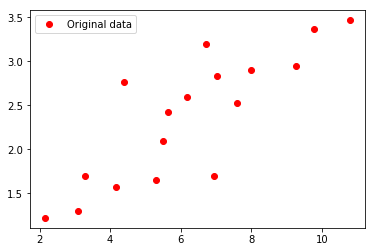

In [27]:
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.legend()
    plt.show()

Epoch: 0001 cost= 1.413662314 W= 0.5515524 b= 0.40722644
Epoch: 0051 cost= 0.086983390 W= 0.30565205 b= 0.39818656
Epoch: 0101 cost= 0.085825473 W= 0.30231795 b= 0.42217126
Epoch: 0151 cost= 0.084801458 W= 0.29918218 b= 0.4447296
Epoch: 0201 cost= 0.083895847 W= 0.29623288 b= 0.4659467
Epoch: 0251 cost= 0.083095014 W= 0.293459 b= 0.4859019
Epoch: 0301 cost= 0.082386859 W= 0.29085013 b= 0.5046696
Epoch: 0351 cost= 0.081760623 W= 0.28839645 b= 0.52232176
Epoch: 0401 cost= 0.081206910 W= 0.2860886 b= 0.53892374
Epoch: 0451 cost= 0.080717251 W= 0.28391817 b= 0.5545383
Epoch: 0501 cost= 0.080284275 W= 0.28187656 b= 0.5692252
Epoch: 0551 cost= 0.079901472 W= 0.27995646 b= 0.5830381
Epoch: 0601 cost= 0.079562992 W= 0.27815047 b= 0.5960302
Epoch: 0651 cost= 0.079263695 W= 0.27645186 b= 0.60824996
Epoch: 0701 cost= 0.078999139 W= 0.27485454 b= 0.6197411
Epoch: 0751 cost= 0.078765243 W= 0.27335232 b= 0.6305481
Epoch: 0801 cost= 0.078558505 W= 0.27193934 b= 0.64071274
Epoch: 0851 cost= 0.07837570

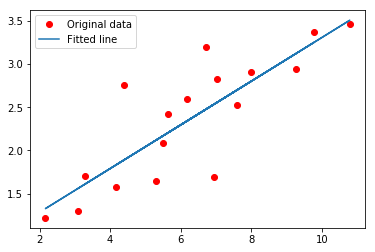

In [28]:
# Launch the graph
with tf.compat.v1.Session() as sess:
    sess.run(init)
    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if epoch % display_step == 0:
            print ("Epoch:", '%04d' % (epoch+1), "cost=", \
                "{:.9f}".format(sess.run(cost, feed_dict={X: train_X, Y:train_Y})), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    print ("cost=", sess.run(cost, feed_dict={X: train_X, Y: train_Y}), \
          "W=", sess.run(W), "b=", sess.run(b))

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()